<h1>Assignment 3 - Machine Learning</h1>
<p>In this assignment we explore a few basic machine learning methods.</p>
<h3>Contents:</h3>
<ol>
    <li><a href="#decisiontrees">Decision Trees</a></li>
    <li><a href="#randomdecisiontree">Decision Trees - Random Feature Selection</a></li>
    <li><a href="#id3decisiontree">Decision Trees - ID3</a></li>
    <li><a href="#keras_tut">Keras Tutorial</a></li>
    <li><a href="#other_data">Exploring another dataset</a></li>
    <li><a href="#overfit">Overfitting</a></li>
    <li><a href="#underfit">Underfitting</a></li>
</ol>

<h2 id="decisiontrees">Decision Trees</h2>
<p>Given a data set we can use machine learning to create decision trees to make a complex decision based on data.  In this assignment we learn decision trees to classify  </p>
<p>We are given the following dataset to work with.</p>
<table>
    <tr><th>No.</th><th>Outlook</th><th>Temperature</th><th>Humidity</th><th>Windy</th><th>Class</th></tr>
    <tr><td>1</td><td>sunny</td><td>hot</td><td>high</td><td>false</td><td>N</td></tr>
    <tr><td>2</td><td>sunny</td><td>hot</td> <td>high</td> <td>true</td> <td>N</td></tr>
    <tr><td>3</td><td>overcast</td><td>hot</td> <td>high</td> <td>false</td> <td>P</td></tr>
    <tr><td>4</td><td>rain</td><td>mild</td> <td>high</td> <td>false</td> <td>P</td></tr>
    <tr><td>5</td><td>rain</td><td>cool</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>6</td><td>rain</td><td>cool</td> <td>normal</td> <td>true</td> <td>N</td></tr>
    <tr><td>7</td><td>overcast</td><td>cool</td> <td>normal</td> <td>true</td> <td>P</td></tr>
    <tr><td>8</td><td>sunny</td><td>mild</td> <td>high</td> <td>false</td> <td>N</td></tr>
    <tr><td>9</td><td>sunny</td><td>cool</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>10</td><td>rain</td><td>mild</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>11</td><td>sunny</td><td>mild</td> <td>normal</td> <td>true</td> <td>P</td></tr>
    <tr><td>12</td><td>overcast</td><td>mild</td> <td>high</td> <td>true</td> <td>P</td></tr>
    <tr><td>13</td><td>overcast</td><td>hot</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>14</td><td>rain</td><td>mild</td> <td>high</td> <td>true</td> <td>N</td></tr>
</table>

<p>Notice we have a number of enumerated features.  For instance the <b>outlook</b> category can be either sunny, overcast or rain.  The <b>temperature</b> can be hot, mild or cool, the <b>humidty</b> can be high or normal.  To make it easier to handle this programatically we can transform these features into <b>1-hot vectors</b>; or in the case of the humidty just a simple boolean.  So instead of our original feature set lets use the following list of binary variables: Sunny, Overcast, Rainy, Hot Mild, Cool, Humid, Windy.  With this in mind we can use the table shown below as the input to our algorithms.</p>

<table>
    <tr><th>No.</th><th>Sunny</th><th>Overcast</th><th>Rainy</th><th>Hot</th><th>Mild</th><th>Cool</th><th>Humid</th><th>Windy</th><th>Class</th></tr>
    <tr><td>1</td> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>N</th></tr>
    <tr><td>2</td> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>T</th> <th>N</th></tr>
    <tr><td>3</td> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>P</th></tr>
    <tr><td>4</td> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>F</th> <th>P</th></tr>
    <tr><td>5</td> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>P</th></tr>
    <tr><td>6</td> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>N</th></tr>
    <tr><td>7</td> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>P</th></tr>
    <tr><td>8</td> <th>T</th> <th>F</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>F</th> <th>N</th></tr> 
    <tr><td>9</td> <th>T</th> <th>F</th> <th>F</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>P</th></tr>
    <tr><td>10</td> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>F</th> <th>P</th></tr>
    <tr><td>11</td> <th>T</th> <th>F</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>P</th></tr>
    <tr><td>12</td> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>T</th> <th>P</th></tr>
    <tr><td>13</td> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>F</th> <th>F</th> <th>F</th> <th>F</th> <th>P</th></tr>
    <tr><td>14</td> <th>F</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>F</th> <th>T</th> <th>T</th> <th>N</th></tr>
</table>

<h3 id="randomdecisiontree">Decision Trees - Random Feature Selection</h3>
<p>When learning a decision tree we can use the following algorithm...</p><br>
<code>While there are data points left to classify:
    1. Pick a feature or features to branch on.
    2. Divide the input data based on the decision.
    3. If either set of the divided data has a single class then let that be the leaf of the tree.</code>

In [29]:
import numpy as np

# Let this be our input vector where we have used 1 to represent a true boolean and 0 to represent a false boolean.
X = np.array([[1, 0, 0, 1, 0, 0, 1, 0],
              [1, 0, 0, 1, 0, 0, 1, 1],
              [0, 1, 0, 1, 0, 0, 1, 0],
              [0, 0, 1, 0, 1, 0, 1, 0],
              [0, 0, 1, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 1, 0, 1],
              [0, 1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 1, 0, 1, 0],
              [1, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 1, 0, 0, 0],
              [1, 0, 0, 0, 1, 0, 0, 1],
              [0, 1, 0, 0, 1, 0, 1, 1],
              [0, 1, 0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 1, 1]])

# Let this be our vector of labels where 1 is positive and 0 is negative.
Y = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

while  

<h2 id="keras_tut">Keras Tutorial</h2>
<p>In this part of the assignment we go through a the basic classification tutorial using keras'</p>
<p>A link to the actual tutorial is <a href="https://www.tensorflow.org/tutorials/keras/basic_classification">here.</a></p>
<p>In this first cell we use some built in functions to download the data set.  It is automatically divided into training sets and test sets for us.  Very convinient.</p>

In [1]:
# Import everything we need.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the data using keras' built in functions...
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

<p>The data set consists of 60,000 images of each 28x28 pixels.  The images contain color.  Keras can automatically flatten the images into a 784 feature vector so we don't have to worry about that.  What we do have to worry about is normalizing the data between 0 and 1 floating point values.  To do this we can just divide the image by 255.0  To save time we just divide the training set and the tests set now.  In practice if you are transforming your training data, you need to transform any other data you want to classify</p>
<p>To do a side by side comparison of the transformation lets make a copy of the first image so we can display it before and after it is scaled.</p>

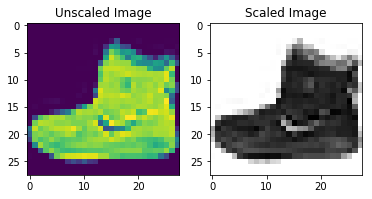

In [2]:
# copy the first image in its unscaled format.
unscaled_first = np.copy(train_images[0])
# scale the rest of the data.
train_images = train_images/255.0
test_images = test_images/255.0

# plot the first image unscaled and scaled side by side.
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(unscaled_first)
ax1.set_title('Unscaled Image')
ax2.imshow(train_images[0], cmap=plt.cm.binary)
ax2.set_title('Scaled Image')
plt.show()

<p>Okay neat we see it has been transformed into a gray scale image between 0 and 1.</p>
<p>Now we just need to use Keras to build our neural network.  We use a "dense" or "fully connected" network to learn the classifications.  It has an input layer with 784 neurons, a hidden layer with 128 neurons and a output layer with 10 neurons.  The hidden layer uses the <a href="https://en.wikipedia.org/wiki/Rectifier_(neural_networks)">Rectified Linear Unit (ReLU)</a> activation function and a ten neuron output layer that is passed through the <a href="https://en.wikipedia.org/wiki/Softmax_function">softmax</a> function.  The softmax function takes a vector of positive and negative values and normalizes them into a unit probability vector.</p>
<p>Of course the reason the network has 10 neurons on its output layer is because there are ten classes in our problem.</p>

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

<p>The next step is to compile the model.  The compile function takes three arguments.</p>
The first is the optimizer. The optimizer is the method used to updates the weight of the network. The second is the loss function. The loss function can be thought of as the error. The optimizer updates the network proportional to the error or loss in the system. The third argument is a list of metrics that we want to plot.  In this case I pass in 'accuracy' and 'loss'</p>

In [31]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<p>Now we can train the model.  We pass in the training set to train the model. The epochs parameter indicates the number of times we want to iterate over the data.</p>

In [32]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4942 - acc: 0.8264 - val_loss: 0.4642 - val_acc: 0.8289
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3771 - acc: 0.8633 - val_loss: 0.3854 - val_acc: 0.8639
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3378 - acc: 0.8767 - val_loss: 0.3699 - val_acc: 0.8638
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3098 - acc: 0.8874 - val_loss: 0.3523 - val_acc: 0.8752
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2937 - acc: 0.8914 - val_loss: 0.3839 - val_acc: 0.8611
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2814 - acc: 0.8949 - val_loss: 0.3535 - val_acc: 0.8749
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2689 - acc: 0.9004 - val_loss: 0.

<p>We saved the history of the training so we can plot it and see how our model is learning. In this case the history contains 'loss', 'acc', 'val_loss', and 'val_acc'.  You can get the history of other parameters by including more parameters in the metrics parameter when compiling.  The loss is automatically included for us.  We also get the 'val_acc' and 'val_loss' data because we specified a valiation set when training the model.</p>

In [36]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<p>Finally we can plot our loss and accuracy for the training set and the test set.</p>
<p>Notice how as we iterate over the epochs our accuracy is increasing and the loss is decreasing for both data sets!</p>

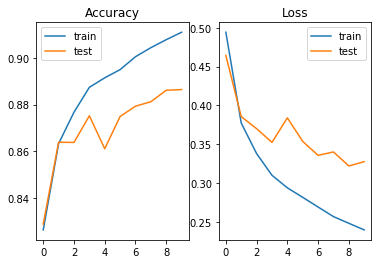

In [38]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.legend(['train', 'test'])
ax1.set_title('Accuracy')
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.legend(['train', 'test'])
ax2.set_title('Loss')
plt.show()